# Introduction

These notes are designed to supplement the material presented in the Lectures on Weak Lensing, aiding readers in understanding the tutorial sessions more effectively. The primary objective is to guide readers in developing their weak lensing signal measurement pipelines.

We will begin the tutorial sessions with a brief introduction to SciServer, which provides the appropriate Python environment and data needed for our work. After that, we will cover some basic Python programming concepts to support the tutorials. Each part of the pipeline will be addressed in a step-by-step manner. 

A quick references for weak  gravitational lensing are:

- [Saas-Fee Advanced Course 33: Gravitational Lensing: Strong, Weak & Micro](https://link.springer.com/book/10.1007/978-3-540-30310-7).

- Also the [arxiv version](https://arxiv.org/abs/astro-ph/0509252).

- Lecture notes on cosmology by [Daniel Baumann](http://cosmology.amsterdam/education/cosmology/).

- Lecture notes on weak gravitational lensing by [Surhud More](https://surhudm.github.io/Weaklensing_IAGRG/index.html).


if you find any errors in these turorials. Please contact me at my [email id](mailto:rana@strw.leidenuniv.nl).

## Working on SciServer

**Steps to start using SciServer cloud computing**

1. Create an account on [SciServer](https://apps.sciserver.org/login-portal//login?callbackUrl=https%3A%2F%2Fapps.sciserver.org%2Fdashboard%2Fgroups%2F95072).

2. Share your account **user name** with us, we will add you to a **common group**. In this group, you all can **access the  shared data**. Also you can **collaborate on a coding work** with those people added in this common group. 

3. Once we add your username to the common group, you are expected to **receive an invitation of the same**. This invitation will become visible to you on the **Groups tab** shown in the image below. Please go ahead and **accept the invitation**. Once you accept the invitation, you will be able to **see directories shared by us** with eveyone in the group. Please confirm that you see it.

4. Go to the **Compute** and create a container (Containers provide you an **interactive jupyter notebook environment** to write and save codes,plots and any other data.)
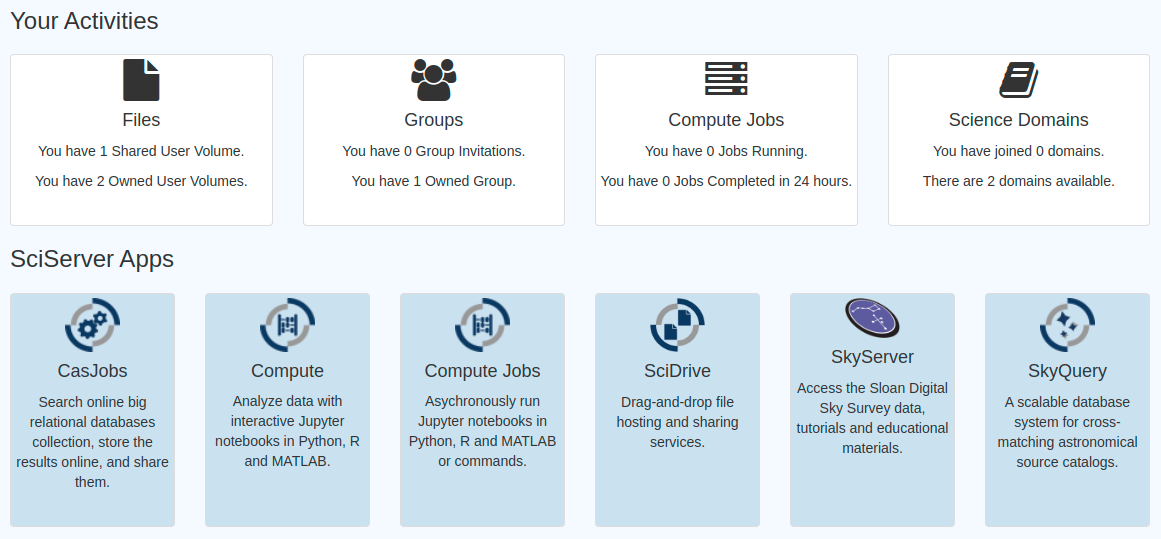


5. You can **choose any arbitrary name** for your container, **check the appropriate boxes** as shown in the image so that your container can access these **User volumes shared by "divyar" user**. You will see other entries with your username instead of dummy_lenser.

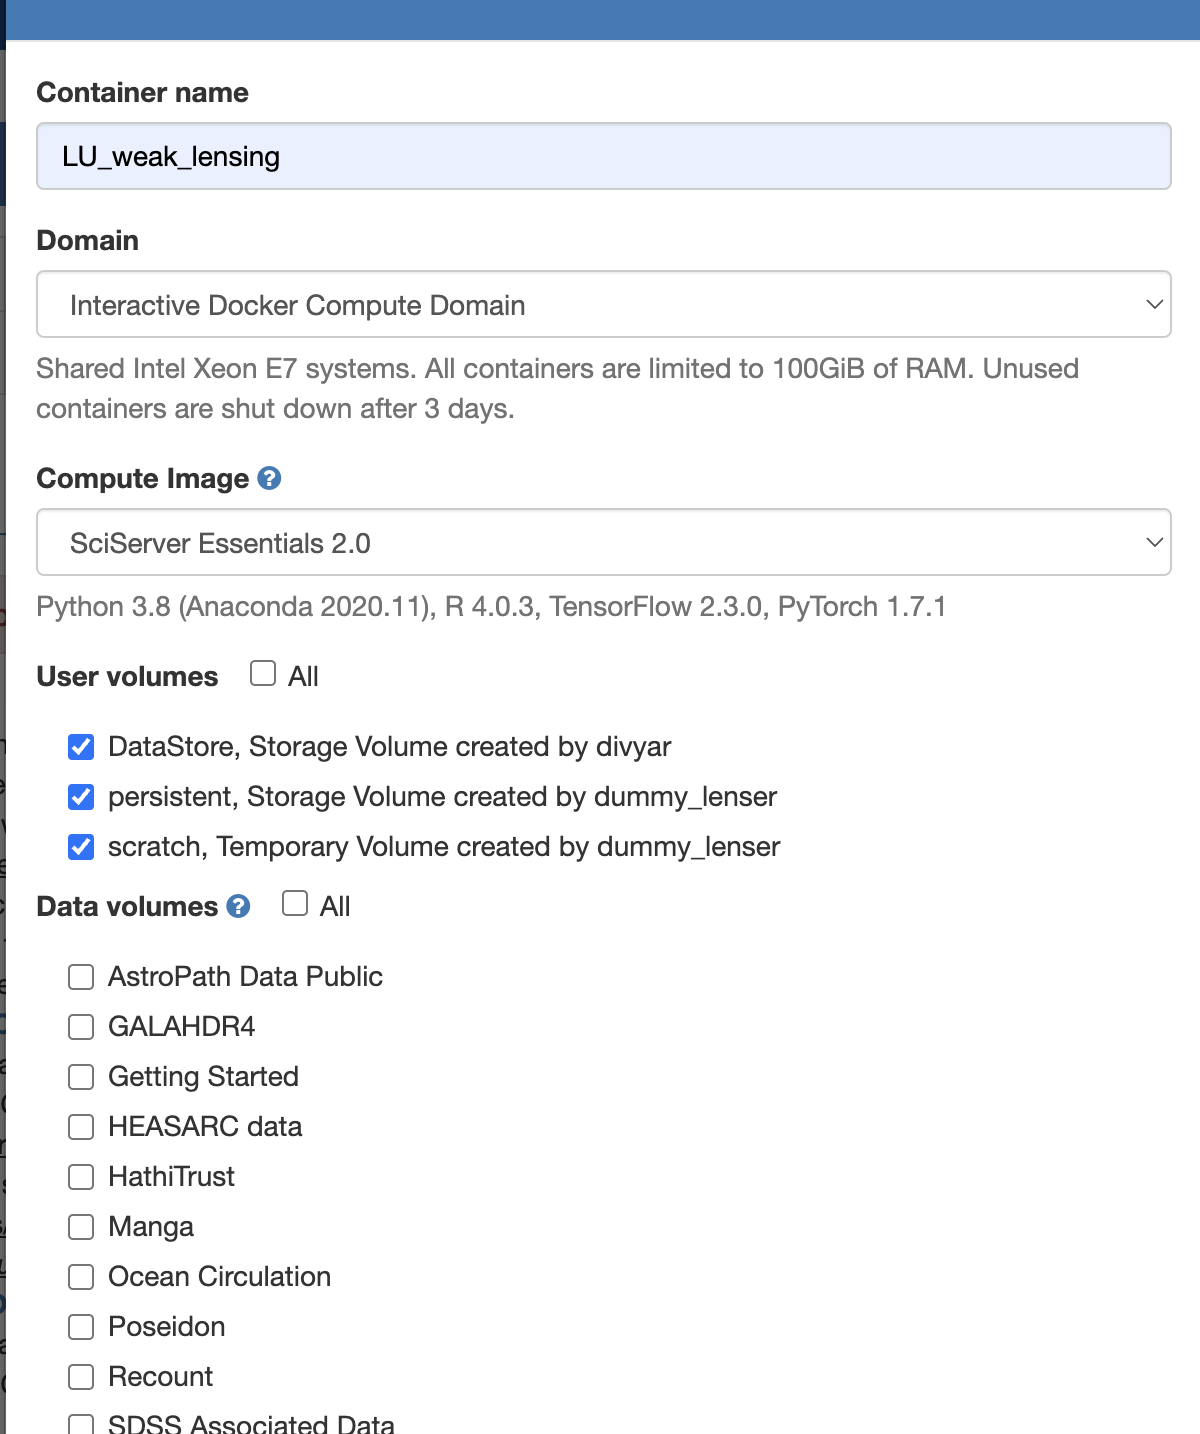

6. Make sure to **read the storage policy carefully** if you want to store your files on SciServer for a long time. It can save you from loosing your valuable data. For the current tutorial, we will **store our codes in "Storage" volume named "persistent"**.

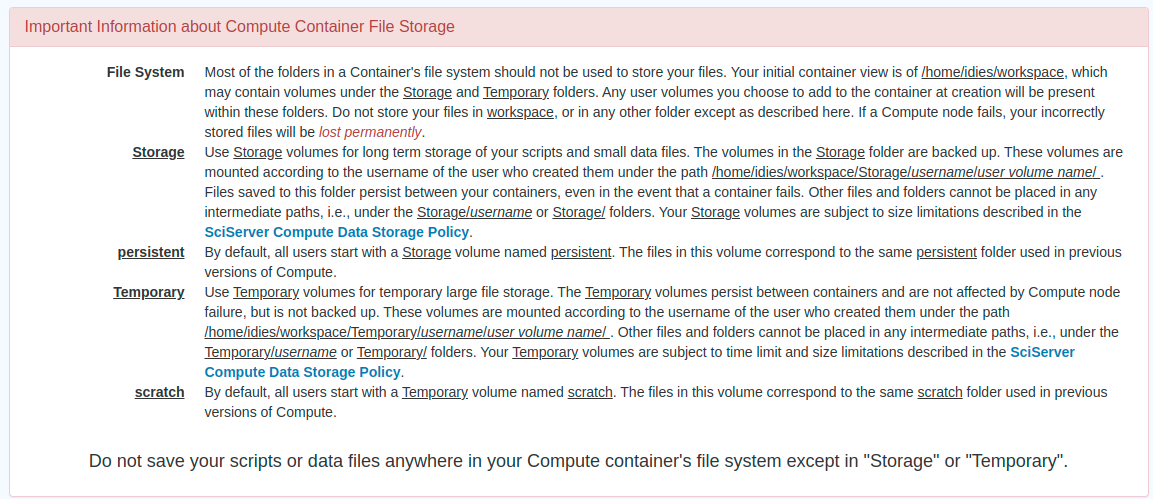

### Your container is ready if it looks something like this -

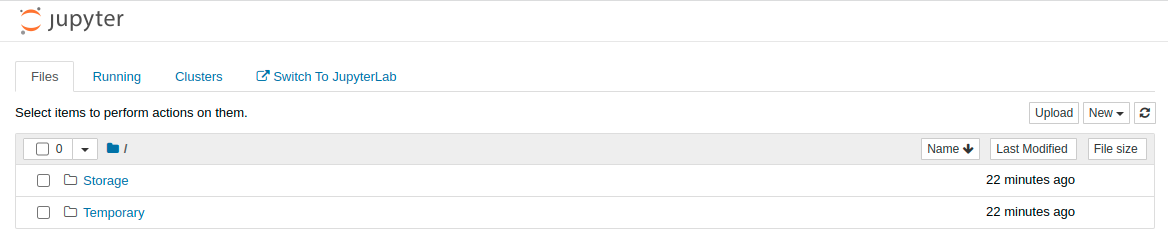

From here, you have to navigate to **Storage/\<your_user_name\>/persistent** directory. You can start creating your files in this directory. 

Please avoid making a directory in **Storage/ or Storage/\<your_user_name\>/** locations, as was explained in the point 6.


### Congratulations!


You are all set up! 

From here on, it's just knowing how to use jupyter notebook to write your codes.

***

## Reading and Plotting the Data

We will first learn how to read files using pandas and then we will plot them to have a feel of the overlap between the lenses and sources. Some of the useful python packages: [pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), [numpy](https://numpy.org/doc/stable/), [matplotlib](https://matplotlib.org/)

**Please not that in the below codes put the right sciserver paths. For our case the file paths are** 

- lenses, **/home/idies/workspace/Storage/divyar/DataStore/Data/redmapper.dat**
- sources, **/home/idies/workspace/Storage/divyar/DataStore/Data/hsc/**

In [3]:
#loading the required packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# we are setting the below params to adjust plots 
plt.rcParams['figure.figsize'] = [3,3]
plt.rcParams['figure.dpi'] = 250

Index(['dec', 'lambda', 'ra', 'zred'], dtype='object')


Text(0.5, 1.0, 'Blue = SDSS, Green = HSC')

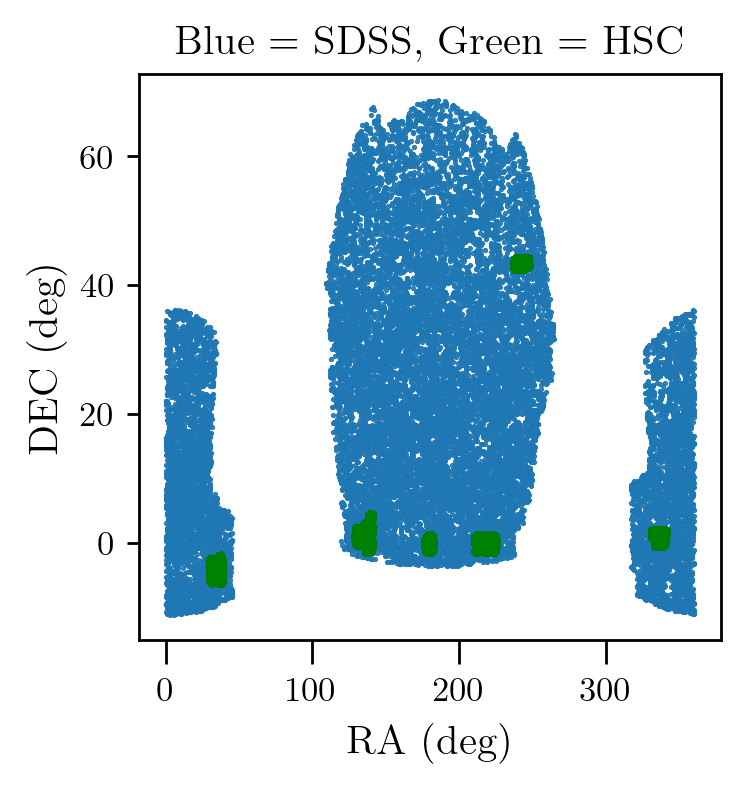

In [9]:
#putting the path of the lens catalog
len_path = '../../weakpipe/DataStore/redmapper.dat'
lenses = pd.read_csv(len_path, delim_whitespace=1)

#printing the columns in the file
print(lenses.keys())

plt.plot(lenses['ra'], lenses['dec'], '.', ms=1.0)

from glob import glob
# we have given you many many files for sources, below code will capture a list of path for the files
# It looks for the file ending '.dat'

#putting the path of the sources catalog
sflist = glob('../../weakpipe/DataStore/hsc/*.dat')

for fil in sflist:
    src = pd.read_csv(fil, delim_whitespace=1)
    plt.plot(src['ragal'], src['decgal'], 'g.', ms=1.0)
plt.xlabel('RA  (deg)')
plt.ylabel('DEC (deg)')
plt.title('Blue = SDSS, Green = HSC')



<div class="alert alert-info">

Exercise: 
    
- Check of the columns names in one of the source files and print them.

</div>

Here, we will play with the data to get comfortable with plotting routines and understand the different selection cuts that can be applied on our lens sample, redmapper cluster catalog for these tutorials : [arXiv:1303.3562](https://arxiv.org/abs/1303.3562).


**Here we are working with selection cuts used in [arXiv:1707.01907](https://arxiv.org/abs/1707.01907)**

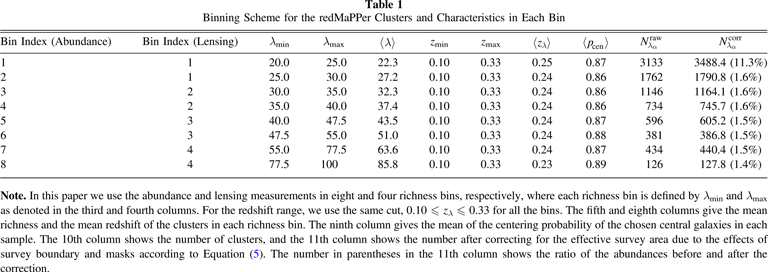

no of bins in first selection cut : 3642


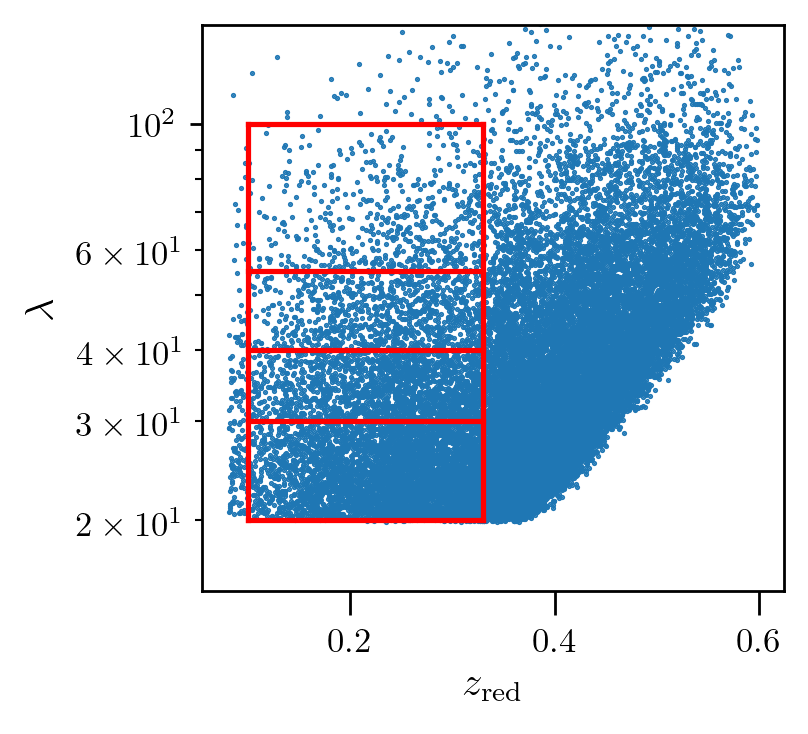

In [11]:
#visualizing the individual selection cuts

plt.plot(lenses['zred'], lenses['lambda'], '.', ms=1.0)
plt.plot(np.linspace(0.1,0.33,10),20*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),30*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),40*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),55*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),100*np.ones(10), 'r-')

plt.plot(0.1*np.ones(10), np.linspace(20,100,10) ,  'r-')
plt.plot(0.33*np.ones(10), np.linspace(20,100,10) , 'r-')

plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$\lambda$')
plt.ylim(15,150)
plt.yscale('log')

#printing the number of lenses in a selection cut
idx = (lenses['zred']>0.1) & (lenses['zred']<0.33) & (lenses['lambda']>25) & (lenses['lambda']<40)
print('no of bins in first selection cut : %d'%np.sum(idx))


<div class="alert alert-info">

Exercise: 
    
- Compute the number of lenses in each lensing selection cut on redshift and richness as give in the above table and check whether they match with the entries in the table.

</div>

As per the table, We will work with last lensing selection cut given as $0.1<z_{\rm red}<0.33$ and $55<\lambda<100$.  

We will also work with cosmological distances for the weak lensing signal measurements. For computing these distances we will use astropy package. Below we are showing how to get the comoving distance as a function of redshift using astropy.

link to astropy cosmo tools - https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html

In [1]:
from astropy.cosmology import FlatLambdaCDM

Text(0, 0.5, '$d_{\\rm com} {\\rm [h^{-1}Mpc]}$')

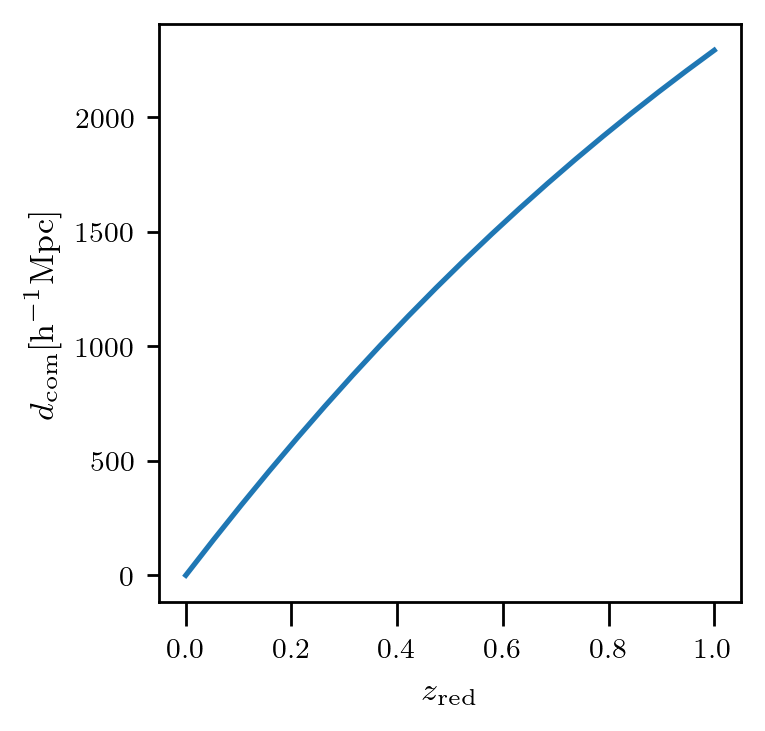

In [4]:
#instance for cosmo distance calculations
cc = FlatLambdaCDM(H0=100, Om0=0.315) # H0=100 so that we can get distance in units of Mpc h-1
zred = np.linspace(0,1,20)

plt.plot(zred, cc.comoving_distance(zred))
plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$d_{\rm com} {\rm [h^{-1}Mpc]}$')

<div class="alert alert-info">

Exercise: 
    
- Similarly get luminosity distance vs redshift and angular diameter distance vs redshifts plots for $\Omega_m$=[0.1, 0.3, 0.8].

</div>